# Tensors

> Tensors


- skip_showdoc: true
- skip_exec: true

In [ ]:
#| default_exp torch

In [ ]:
import torch
import numpy as np


In [ ]:
torch.cuda.is_available()

True

## Data Types

In [ ]:
float_tensor = torch.ones(1, dtype=torch.float)
float_tensor.dtype

torch.float32

In [ ]:
double_tensor = torch.ones(1, dtype=torch.double)
double_tensor.dtype

torch.float64

In [ ]:
complex_float_tensor = torch.ones(1, dtype=torch.complex64)
complex_float_tensor.dtype

torch.complex64

In [ ]:
complex_double_tensor = torch.ones(1, dtype=torch.complex128)
complex_double_tensor.dtype

torch.complex128

In [ ]:
int_tensor = torch.ones(1, dtype=torch.int)
int_tensor.dtype


torch.int32

In [ ]:
long_tensor = torch.ones(1, dtype=torch.long)
long_tensor.dtype

torch.int64

In [ ]:
uint_tensor = torch.ones(1, dtype=torch.uint8)
uint_tensor.dtype

torch.uint8

In [ ]:
double_tensor = torch.ones(1, dtype=torch.double)
double_tensor.dtype

torch.float64

In [ ]:
bool_tensor = torch.ones(1, dtype=torch.bool)
bool_tensor.dtype

torch.bool

## Creation Operations

### torch.is_tensor

In [ ]:
x = torch.tensor([1, 2, 3])
x, torch.is_tensor(x)

(tensor([1, 2, 3]), True)

### torch.set_default_device

In [ ]:
torch.tensor([1.2, 3]).device

device(type='cpu')

In [ ]:
torch.set_default_device('cuda')  # current device is 0
torch.tensor([1.2, 3]).device

device(type='cuda', index=0)

In [ ]:
torch.set_default_device('cpu')
a = torch.arange(1000000)
a

tensor([     0,      1,      2,  ..., 999997, 999998, 999999])

In [ ]:
%%time 
a + 1

CPU times: user 20.7 ms, sys: 25.4 ms, total: 46.1 ms
Wall time: 7.37 ms


tensor([      1,       2,       3,  ...,  999998,  999999, 1000000])

In [ ]:
torch.set_default_device('cuda')
a = torch.arange(1000000)
a

tensor([     0,      1,      2,  ..., 999997, 999998, 999999], device='cuda:0')

In [ ]:
%%time 
a + 1

CPU times: user 6.29 ms, sys: 0 ns, total: 6.29 ms
Wall time: 912 µs


tensor([      1,       2,       3,  ...,  999998,  999999, 1000000],
       device='cuda:0')

### torch.get_default_dtype

In [ ]:
torch.get_default_dtype()  # initial default for floating point is torch.float32

torch.float32

In [ ]:
torch.set_default_dtype(torch.float64)
torch.get_default_dtype()  # default is now changed to torch.float64

torch.float64

### torch.set_printoptions

In [ ]:
# Limit the precision of elements
torch.set_printoptions(precision=2)
torch.tensor([1.12345])

tensor([1.12], device='cuda:0')

In [ ]:
# Limit the number of elements shown
torch.set_printoptions(threshold=5)
torch.arange(10)

tensor([0, 1, 2,  ..., 7, 8, 9], device='cuda:0')

In [ ]:
# Restore defaults
torch.set_printoptions(profile='default')
torch.tensor([1.12345])

tensor([1.1235], device='cuda:0')

In [ ]:
torch.set_default_device('cpu')
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### torch.as_tensor

In [ ]:
a = np.array([1, 2, 3])
t = torch.as_tensor(a)
t

tensor([1, 2, 3])

In [ ]:
t[0] = -1
a

array([-1,  2,  3])

In [ ]:
a = np.array([1, 2, 3])
t = torch.as_tensor(a, device=torch.device('cuda'))
t

tensor([1, 2, 3], device='cuda:0')

In [ ]:
t[0] = -1
a

array([1, 2, 3])

In [ ]:
t

tensor([-1,  2,  3], device='cuda:0')

### torch.zeros

In [ ]:
torch.empty((2,2))

tensor([[1.3554e-20, 3.0851e-41],
        [1.3552e-20, 3.0851e-41]])

In [ ]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

In [ ]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

### torch.range

In [ ]:
torch.arange(5), torch.arange(1, 4), torch.arange(1, 2.5, 0.5)

(tensor([0, 1, 2, 3, 4]), tensor([1, 2, 3]), tensor([1.0000, 1.5000, 2.0000]))

In [ ]:
torch.linspace(3, 10, steps=5),\
torch.linspace(-10, 10, steps=5),\
torch.linspace(start=-10, end=10, steps=5),\
torch.linspace(start=-10, end=10, steps=1)

(tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000]),
 tensor([-10.,  -5.,   0.,   5.,  10.]),
 tensor([-10.,  -5.,   0.,   5.,  10.]),
 tensor([-10.]))

In [ ]:
torch.logspace(start=-10, end=10, steps=5),\
torch.logspace(start=0.1, end=1.0, steps=5),\
torch.logspace(start=0.1, end=1.0, steps=1),\
torch.logspace(start=2, end=2, steps=1, base=2)

(tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10]),
 tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000]),
 tensor([1.2589]),
 tensor([4.]))

In [ ]:
torch.empty((2,3), dtype=torch.int64)

tensor([[    140634107035024,     140634107035024, 7454421801564381752],
        [2322206376936961119, 7310597164893758754,                 145]])

In [ ]:
torch.full((2, 3), 3.141592)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

### torch.quantize_per_tensor

In [ ]:
torch.set_default_dtype(torch.float32)

In [ ]:
torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), 0.1, 10, torch.quint8),\
torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), 0.1, 10, torch.quint8).int_repr(),\
torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]), torch.tensor(0.1), torch.tensor(10), torch.quint8)

(tensor([-1.,  0.,  1.,  2.], size=(4,), dtype=torch.quint8,
        quantization_scheme=torch.per_tensor_affine, scale=0.1, zero_point=10),
 tensor([ 0, 10, 20, 30], dtype=torch.uint8),
 tensor([-1.,  0.,  1.,  2.], size=(4,), dtype=torch.quint8,
        quantization_scheme=torch.per_tensor_affine, scale=0.10000000149011612,
        zero_point=10))

### torch.complex

In [ ]:
real = torch.tensor([1, 2], dtype=torch.float32)
imag = torch.tensor([3, 4], dtype=torch.float32)
z = torch.complex(real, imag)
z.dtype

torch.complex64

In [ ]:
real, imag, z

(tensor([1., 2.]), tensor([3., 4.]), tensor([1.+3.j, 2.+4.j]))

### torch.polar

In [ ]:
import numpy as np
abs = torch.tensor([1, 2], dtype=torch.float64)
angle = torch.tensor([np.pi / 2, 5 * np.pi / 4], dtype=torch.float64)
z = torch.polar(abs, angle)
z

tensor([ 6.1232e-17+1.0000j, -1.4142e+00-1.4142j], dtype=torch.complex128)

## Indexing, Slicing, Joining, Mutating Ops

### torch.cat

In [ ]:
x = torch.randn(2, 3)
x

tensor([[-0.1340,  0.5254, -0.3770],
        [-2.0310, -0.8961, -0.6459]])

In [ ]:
torch.cat((x, x, x), 0)

tensor([[-0.1340,  0.5254, -0.3770],
        [-2.0310, -0.8961, -0.6459],
        [-0.1340,  0.5254, -0.3770],
        [-2.0310, -0.8961, -0.6459],
        [-0.1340,  0.5254, -0.3770],
        [-2.0310, -0.8961, -0.6459]])

In [ ]:
torch.cat((x, x), 1)

tensor([[-0.1340,  0.5254, -0.3770, -0.1340,  0.5254, -0.3770],
        [-2.0310, -0.8961, -0.6459, -2.0310, -0.8961, -0.6459]])

### torch.conj

In [ ]:
x = torch.tensor([-1 + 1j, -2 + 2j, 3 - 3j])
x, x.is_conj()

(tensor([-1.+1.j, -2.+2.j,  3.-3.j]), False)

In [ ]:
y = torch.conj(x)
y, y.is_conj()

(tensor([-1.-1.j, -2.-2.j,  3.+3.j]), True)

### torch.permute

In [ ]:
x = torch.randn(2, 3, 5)
x.size()

torch.Size([2, 3, 5])

In [ ]:
torch.permute(x, (2, 0, 1)).size()

torch.Size([5, 2, 3])

### torch.reshape

In [ ]:
a = torch.arange(4.)
a

tensor([0., 1., 2., 3.])

In [ ]:
torch.reshape(a, (2, 2))

tensor([[0., 1.],
        [2., 3.]])

In [ ]:
b = torch.tensor([[0, 1], [2, 3]])
b

tensor([[0, 1],
        [2, 3]])

In [ ]:
torch.reshape(b, (-1,))

tensor([0, 1, 2, 3])

### torch.movedim

In [ ]:
t = torch.randn(2,3,5)
t.size()

torch.Size([2, 3, 5])

In [ ]:
torch.movedim(t, 1, 0).shape

torch.Size([3, 2, 5])

In [ ]:
torch.movedim(t, 1, 0)

tensor([[[-1.0370, -0.2811,  0.2693,  0.5935, -0.1354],
         [-2.7575, -2.4650,  0.8077, -0.2873, -1.2993]],

        [[-0.6173, -0.0460, -0.6329,  1.0519, -0.1674],
         [-0.8958, -0.2828,  1.2355, -1.1782, -1.3597]],

        [[-2.0996, -0.6692, -0.7840,  0.1171,  0.0334],
         [ 0.4422,  0.2438,  1.0947, -1.2390, -1.4378]]])

In [ ]:
torch.movedim(t, (1, 2), (0, 1)).shape

torch.Size([3, 5, 2])

### torch.split

In [ ]:
a = torch.arange(10).reshape(5, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
torch.split(a, 2)

(tensor([[0, 1],
         [2, 3]]),
 tensor([[4, 5],
         [6, 7]]),
 tensor([[8, 9]]))

In [ ]:
torch.split(a, [1, 4])

(tensor([[0, 1]]),
 tensor([[2, 3],
         [4, 5],
         [6, 7],
         [8, 9]]))

### torch.t

In [ ]:
x = torch.randn(())
x, torch.t(x)

(tensor(-0.6261), tensor(-0.6261))

In [ ]:
x = torch.randn(3)
x, torch.t(x)

(tensor([-1.2207, -0.6549, -0.0028]), tensor([-1.2207, -0.6549, -0.0028]))

In [ ]:
x = torch.randn(2, 3)
x, torch.t(x)

(tensor([[-2.0021,  1.3072, -0.9742],
         [-1.8025,  0.5369,  0.2517]]),
 tensor([[-2.0021, -1.8025],
         [ 1.3072,  0.5369],
         [-0.9742,  0.2517]]))

## Rand

### torch.rand

In [ ]:
torch.rand(4)

tensor([0.7377, 0.8273, 0.2958, 0.8372])

In [ ]:
torch.rand(2, 3)

tensor([[0.5028, 0.1841, 0.1133],
        [0.4431, 0.0016, 0.8662]])

### torch.randint

In [ ]:
torch.randint(3, 5, (3,))

tensor([4, 3, 3])

In [ ]:
torch.randint(10, (2, 2))

tensor([[5, 3],
        [8, 1]])

In [ ]:
torch.randint(3, 10, (2, 2))

tensor([[8, 3],
        [8, 3]])

### torch.randn

In [ ]:
torch.randn(4)

tensor([0.2036, 0.3526, 0.7444, 1.0029])

In [ ]:
torch.randn(2, 3)

tensor([[-0.3317,  3.1649,  2.7242],
        [ 0.2243,  1.2105,  0.9819]])

### torch.normal

In [ ]:
torch.normal(mean=torch.arange(1., 11.), std=torch.arange(1, 0, -0.1))

tensor([ 0.3426,  0.6076,  3.0707,  3.1876,  5.1126,  6.5160,  6.9380,  8.2192,
         8.9378, 10.0406])

In [ ]:
torch.normal(mean=0.5, std=torch.arange(1., 6.))

tensor([1.4364, 1.6189, 0.1503, 2.7895, 3.0156])

In [ ]:
torch.normal(mean=torch.arange(1., 6.))

tensor([0.8270, 0.5561, 2.5076, 2.7576, 2.9344])

In [ ]:
torch.normal(2, 3, size=(1, 4))

tensor([[-1.9720,  2.4059,  3.3461,  0.6155]])

## Save and Load

In [ ]:
# Save to file
import io
x = torch.tensor([0, 1, 2, 3, 4])
torch.save(x, 'Data/tensor.pt')
# Save to io.BytesIO buffer
buffer = io.BytesIO()
torch.save(x, buffer)

    torch.load('tensors.pt', weights_only=True)

    torch.load('tensors.pt', map_location=torch.device('cpu'), weights_only=True)
    torch.load('tensors.pt', map_location=lambda storage, loc: storage, weights_only=True)
    torch.load('tensors.pt', map_location=lambda storage, loc: storage.cuda(1), weights_only=True)
    torch.load('tensors.pt', map_location={'cuda:1': 'cuda:0'}, weights_only=True)
    with open('tensor.pt', 'rb') as f:
        buffer = io.BytesIO(f.read())
    torch.load(buffer, weights_only=False)
    torch.load('module.pt', encoding='ascii', weights_only=False)

## Parallelism

In [ ]:
torch.get_num_threads()

6

In [ ]:
torch.set_num_threads(12)

In [ ]:
torch.get_num_interop_threads()

6

In [ ]:
torch.set_num_interop_threads(12)

## Locally disabling gradient computation

In [ ]:
x = torch.zeros(1, requires_grad=True)
with torch.no_grad():
    y = x * 2
y.requires_grad

False

In [ ]:
is_train = False
with torch.set_grad_enabled(is_train):
    y = x * 2
y.requires_grad

False

In [ ]:
torch.set_grad_enabled(True)  # this can also be used as a function
y = x * 2
y.requires_grad

True

In [ ]:
torch.set_grad_enabled(False)
y = x * 2
y.requires_grad

False

### no_grad

In [ ]:
x = torch.tensor([1.], requires_grad=True)
with torch.no_grad():
    y = x * 2
y.requires_grad

False

In [ ]:
@torch.no_grad()
def doubler(x):
    return x * 2
z = doubler(x)
z.requires_grad

False

In [ ]:
@torch.no_grad()
def tripler(x):
    return x * 3
z = tripler(x)
z.requires_grad
# factory function exception
with torch.no_grad():
    a = torch.nn.Parameter(torch.rand(10))
a.requires_grad

True

## Math operations

In [ ]:
torch.abs(torch.tensor([-1, -2, 3]))

tensor([1, 2, 3])

In [ ]:
a = torch.randn(4)
a

tensor([ 0.1512, -0.5116,  1.4073, -0.9758])

In [ ]:
torch.add(a, 20)

tensor([20.1512, 19.4884, 21.4073, 19.0242])

In [ ]:
b = torch.randn(4)
c = torch.randn(4, 1)
b,c, torch.add(b, c, alpha=10)

(tensor([-0.5080, -0.2541,  0.7946, -0.7497]),
 tensor([[ 0.3399],
         [-0.8642],
         [-1.4262],
         [ 0.3894]]),
 tensor([[  2.8912,   3.1451,   4.1939,   2.6495],
         [ -9.1502,  -8.8963,  -7.8475,  -9.3918],
         [-14.7701, -14.5162, -13.4674, -15.0117],
         [  3.3861,   3.6400,   4.6887,   3.1444]]))

In [ ]:
torch.asin(a)

tensor([ 0.1518, -0.5370,     nan, -1.3503])

In [ ]:
torch.bitwise_not(torch.tensor([-1, -2, 3], dtype=torch.int8))

tensor([ 0,  1, -4], dtype=torch.int8)

In [ ]:
torch.ceil(a)

tensor([1., -0., 2., -0.])

In [ ]:
torch.clamp(a, min=-0.5, max=0.5)

tensor([ 0.1512, -0.5000,  0.5000, -0.5000])

In [ ]:
min = torch.linspace(-1, 1, steps=4)
min, torch.clamp(a, min=min)

(tensor([-1.0000, -0.3333,  0.3333,  1.0000]),
 tensor([ 0.1512, -0.3333,  1.4073,  1.0000]))

### Gradient 

In [ ]:
# Estimates the gradient of f(x)=x^2 at points [-2, -1, 2, 4]
coordinates = (torch.tensor([-2., -1., 1., 4.]),)
values = torch.tensor([4., 1., 1., 16.], )
torch.gradient(values, spacing = coordinates)

(tensor([-3., -2.,  2.,  5.]),)

In [ ]:
# Estimates the gradient of the R^2 -> R function whose samples are
# described by the tensor t. Implicit coordinates are [0, 1] for the outermost
# dimension and [0, 1, 2, 3] for the innermost dimension, and function estimates
# partial derivative for both dimensions.
t = torch.tensor([[1, 2, 4, 8], [10, 20, 40, 80]])
torch.gradient(t)

(tensor([[ 9., 18., 36., 72.],
         [ 9., 18., 36., 72.]]),
 tensor([[ 1.0000,  1.5000,  3.0000,  4.0000],
         [10.0000, 15.0000, 30.0000, 40.0000]]))

In [ ]:
# A scalar value for spacing modifies the relationship between tensor indices
# and input coordinates by multiplying the indices to find the
# coordinates. For example, below the indices of the innermost
# 0, 1, 2, 3 translate to coordinates of [0, 2, 4, 6], and the indices of
# the outermost dimension 0, 1 translate to coordinates of [0, 2].
torch.gradient(t, spacing = 2.0) # dim = None (implicitly [0, 1])
# doubling the spacing between samples halves the estimated partial gradients.

(tensor([[ 4.5000,  9.0000, 18.0000, 36.0000],
         [ 4.5000,  9.0000, 18.0000, 36.0000]]),
 tensor([[ 0.5000,  0.7500,  1.5000,  2.0000],
         [ 5.0000,  7.5000, 15.0000, 20.0000]]))

In [ ]:
# Estimates only the partial derivative for dimension 1
torch.gradient(t, dim = 1) # spacing = None (implicitly 1.)

(tensor([[ 1.0000,  1.5000,  3.0000,  4.0000],
         [10.0000, 15.0000, 30.0000, 40.0000]]),)

In [ ]:
# When spacing is a list of scalars, the relationship between the tensor
# indices and input coordinates changes based on dimension.
# For example, below, the indices of the innermost dimension 0, 1, 2, 3 translate
# to coordinates of [0, 3, 6, 9], and the indices of the outermost dimension
# 0, 1 translate to coordinates of [0, 2].
torch.gradient(t, spacing = [3., 2.])

(tensor([[ 3.,  6., 12., 24.],
         [ 3.,  6., 12., 24.]]),
 tensor([[ 0.5000,  0.7500,  1.5000,  2.0000],
         [ 5.0000,  7.5000, 15.0000, 20.0000]]))

In [ ]:
# The following example is a replication of the previous one with explicit
# coordinates.
coords = (torch.tensor([0, 2]), torch.tensor([0, 3, 6, 9]))
torch.gradient(t, spacing = coords)

(tensor([[ 4.5000,  9.0000, 18.0000, 36.0000],
         [ 4.5000,  9.0000, 18.0000, 36.0000]]),
 tensor([[ 0.3333,  0.5000,  1.0000,  1.3333],
         [ 3.3333,  5.0000, 10.0000, 13.3333]]))

### Reduction Ops

In [ ]:
a = torch.randn(4, 4)
a

tensor([[ 0.5653, -1.6250, -1.7234,  1.6898],
        [ 0.0964,  0.4920, -0.8990,  0.2050],
        [-0.0388, -0.3062, -2.7269,  2.2214],
        [-0.4256, -1.3614,  1.6437,  1.3073]])

In [ ]:
torch.argmax(a), torch.argmin(a)

(tensor(11), tensor(10))

In [ ]:
torch.argmax(a, dim=1), torch.argmin(a, dim=1)

(tensor([3, 1, 3, 2]), tensor([2, 2, 2, 1]))

In [ ]:
torch.argmin(a, dim=1, keepdim=True)

tensor([[2],
        [2],
        [2],
        [1]])

In [ ]:
torch.amax(a, 0)

tensor([0.5653, 0.4920, 1.6437, 2.2214])

In [ ]:
torch.amin(a, 0)

tensor([-0.4256, -1.6250, -2.7269,  0.2050])

Tests if all element in input evaluates to True.

In [ ]:
torch.all(a)

tensor(True)

Tests if any element in input evaluates to True.

In [ ]:
torch.any(a)

tensor(True)

In [ ]:
x = torch.randn(4)
y = torch.randn(4)
x,y

(tensor([-0.8039, -1.4679,  0.4484, -0.5348]),
 tensor([-0.5979, -1.1656, -1.2298, -0.2573]))

In [ ]:
torch.dist(x, y, 3.5)

tensor(1.6806)

In [ ]:
torch.dist(x, y, 3)

tensor(1.6850)

In [ ]:
torch.dist(x, y, 0)

tensor(4.)

In [ ]:
torch.dist(x, y, 2)

tensor(1.7399)

In [ ]:
a = torch.randn(1, 3)
a

tensor([[-0.7396, -1.3435,  1.0013]])

In [ ]:
torch.mean(a)

tensor(-0.3606)

In [ ]:
torch.prod(a)

tensor(0.9949)

In [ ]:
a = torch.randn(4, 2)
a

tensor([[-0.0451, -0.4858],
        [-0.1007,  0.4423],
        [-0.2149,  0.4494],
        [ 0.7059,  0.0417]])

In [ ]:
torch.prod(a, 1)

tensor([ 0.0219, -0.0446, -0.0966,  0.0295])

In [ ]:
torch.std(a, dim=1, keepdim=True)

tensor([[0.3116],
        [0.3840],
        [0.4697],
        [0.4696]])

In [ ]:
torch.sum(a)

tensor(0.7927)

In [ ]:
torch.sum(a, 0)

tensor([0.3451, 0.4476])

In [ ]:
torch.var(a, dim=0, keepdim=True)

tensor([[0.1756, 0.1951]])

In [ ]:
torch.var_mean(a, dim=0, keepdim=True)

(tensor([[0.1756, 0.1951]]), tensor([[0.0863, 0.1119]]))

### Comparison Ops

In [ ]:
torch.eq(torch.tensor([[1, 2], [3, 4]]), torch.tensor([[1, 1], [4, 4]]))

tensor([[ True, False],
        [False,  True]])

In [ ]:
torch.allclose(torch.tensor([10000., 1e-07]), torch.tensor([10000.1, 1e-08]))

False

In [ ]:
torch.isnan(torch.tensor([1, float('nan'), 2]))

tensor([False,  True, False])

### Broadcast

In [ ]:
x = torch.tensor([1, 2, 3])
torch.broadcast_to(x, (3, 3))

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [ ]:
torch.broadcast_shapes((2,), (3, 1), (1, 1, 1))

torch.Size([1, 3, 2])

In [ ]:
x = torch.tensor([[0, 2], [1, 1], [2, 0]]).T
x
x, torch.cov(x)

(tensor([[0, 1, 2],
         [2, 1, 0]]),
 tensor([[ 1., -1.],
         [-1.,  1.]]))

### Covolution

In [ ]:
torch.cov(x, correction=0)

tensor([[ 0.6667, -0.6667],
        [-0.6667,  0.6667]])

In [ ]:
fw = torch.randint(1, 10, (3,))
aw = torch.rand(3)
fw, aw, torch.cov(x, fweights=fw, aweights=aw)

(tensor([2, 2, 9]),
 tensor([0.1281, 0.5609, 0.1982]),
 tensor([[ 0.4583, -0.4583],
         [-0.4583,  0.4583]]))

### Diagonal

In [ ]:
a = torch.randn(3)
a, torch.diag(a)

(tensor([-0.0159, -0.2550, -0.3652]),
 tensor([[-0.0159,  0.0000,  0.0000],
         [ 0.0000, -0.2550,  0.0000],
         [ 0.0000,  0.0000, -0.3652]]))

In [ ]:
torch.diag(a, 1)

tensor([[ 0.0000, -0.0159,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.2550,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.3652],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])

In [ ]:
a = torch.randn(3, 3)
a

tensor([[ 0.8558, -0.8227,  1.5082],
        [-0.6674, -0.0815, -0.5271],
        [-0.1011, -0.3513,  0.1919]])

In [ ]:
torch.diag(a, 0)

tensor([ 0.8558, -0.0815,  0.1919])

In [ ]:
torch.diag(a, 1)

tensor([-0.8227, -0.5271])

### Diff

In [ ]:
a = torch.tensor([1, 3, 2])
a, torch.diff(a)

(tensor([1, 3, 2]), tensor([ 2, -1]))

In [ ]:
torch.gradient(a)

(tensor([ 2.0000,  0.5000, -1.0000]),)

In [ ]:
b = torch.tensor([4, 5])
torch.diff(a, append=b)

tensor([ 2, -1,  2,  1])

In [ ]:
c = torch.tensor([[1, 2, 3], [3, 4, 5]])
c

tensor([[1, 2, 3],
        [3, 4, 5]])

In [ ]:
torch.diff(c, dim=0)

tensor([[2, 2, 2]])

In [ ]:
torch.diff(c, dim=1)

tensor([[1, 1],
        [1, 1]])

### Einsum

In [ ]:
# trace
torch.einsum('ii', torch.randn(4, 4))

tensor(2.8873)

In [ ]:
# diagonal
torch.einsum('ii->i', torch.randn(4, 4))

tensor([ 0.1727, -1.2934,  0.1134,  0.6699])

In [ ]:
# outer product
x = torch.randn(5)
y = torch.randn(4)
x,y

(tensor([ 0.8261,  2.2608,  0.5666, -2.3195, -1.1706]),
 tensor([-0.1575,  1.3682, -1.6248, -0.4177]))

In [ ]:

torch.einsum('i,j->ij', x, y)

tensor([[-0.1301,  1.1302, -1.3423, -0.3451],
        [-0.3561,  3.0932, -3.6735, -0.9444],
        [-0.0892,  0.7751, -0.9206, -0.2367],
        [ 0.3653, -3.1735,  3.7688,  0.9689],
        [ 0.1844, -1.6016,  1.9021,  0.4890]])

In [ ]:
# batch matrix multiplication
As = torch.randn(3, 2, 5)
Bs = torch.randn(3, 5, 4)
As, Bs

(tensor([[[ 1.7602,  1.3836, -0.8395,  1.2415,  0.2106],
          [-1.0765, -1.6569,  1.0785,  2.6039, -0.2173]],
 
         [[-0.3606,  0.7737, -0.3265, -0.3982, -0.1795],
          [ 0.4787,  0.3987,  0.5030,  2.0617, -1.2417]],
 
         [[ 1.2606, -1.7532,  1.2267,  0.2588, -0.6794],
          [ 0.4158,  0.3457, -0.3235, -1.4921, -1.0168]]]),
 tensor([[[-1.1582, -0.5702, -0.5820,  1.4487],
          [ 1.6068,  0.6026,  1.4152,  0.7676],
          [-1.3955, -0.1634, -0.9673, -1.1214],
          [ 0.8568, -1.2561, -1.0304,  0.8901],
          [ 0.1840,  0.1531,  1.4496,  1.6163]],
 
         [[-0.0585, -0.2001,  0.1084, -0.9644],
          [-0.6568,  1.1768, -1.4877,  0.0249],
          [-0.1339,  0.2070,  1.4734,  0.0627],
          [ 0.3322,  0.5430, -0.5031,  0.1328],
          [ 0.0214,  1.1490,  0.4914,  0.2774]],
 
         [[ 0.3791,  0.3227, -2.6659,  0.6282],
          [ 1.6384,  0.2688, -2.1299,  1.0743],
          [ 0.1086, -0.0778, -0.2566,  0.0419],
          [ 0.0142,

In [ ]:
torch.einsum('bij,bjk->bik', As, Bs)

tensor([[[ 2.4586, -1.5598,  0.7718,  5.9990],
         [-0.7296, -3.8648, -5.7596, -2.0744]],

        [[-0.5795,  0.4926, -1.5591,  0.2439],
         [ 0.3011,  0.1702, -1.4475, -0.4909]],

        [[-2.3460, -0.2277,  0.3280,  0.4358],
         [ 0.5354, -3.4429,  1.8989, -0.8684]]])

In [ ]:
# with sublist format and ellipsis
torch.einsum(As, [..., 0, 1], Bs, [..., 1, 2], [..., 0, 2])

tensor([[[ 2.4586, -1.5598,  0.7718,  5.9990],
         [-0.7296, -3.8648, -5.7596, -2.0744]],

        [[-0.5795,  0.4926, -1.5591,  0.2439],
         [ 0.3011,  0.1702, -1.4475, -0.4909]],

        [[-2.3460, -0.2277,  0.3280,  0.4358],
         [ 0.5354, -3.4429,  1.8989, -0.8684]]])

In [ ]:
# batch permute
A = torch.randn(2, 3, 4, 5)
torch.einsum('...ij->...ji', A).shape

torch.Size([2, 3, 5, 4])

In [ ]:
# equivalent to torch.nn.functional.bilinear
A = torch.randn(3, 5, 4)
l = torch.randn(2, 5)
r = torch.randn(2, 4)
A,l,r

(tensor([[[-0.5127, -0.0817, -0.5872, -2.0090],
          [-0.3169, -1.0569, -0.2818,  1.8631],
          [-1.5130, -0.7615, -0.3052,  0.7982],
          [-0.3297,  1.6522,  0.9849, -1.5223],
          [-0.5275,  0.1215, -0.5165, -0.4254]],
 
         [[ 0.7555, -0.9271,  2.2486, -0.5548],
          [ 0.0759, -0.3391, -1.3095, -0.2525],
          [-0.2529, -1.0799,  0.5418,  0.4821],
          [ 0.8987, -0.0494, -0.5371, -1.5568],
          [-0.2188,  0.9023,  0.8624,  0.7310]],
 
         [[ 2.1191,  0.3084, -0.8052, -0.2008],
          [-0.3211, -0.4985,  0.3982, -1.0806],
          [ 0.6403, -0.8154, -2.6253,  2.4096],
          [ 0.5290, -1.3181, -0.8800,  0.9082],
          [-0.8891, -1.0462,  1.2305, -0.7983]]]),
 tensor([[ 1.1455, -1.6298,  0.2697,  1.6974, -1.9843],
         [ 0.5881, -0.7756,  0.5787, -0.1486, -1.0844]]),
 tensor([[-0.4899,  0.0820, -0.1346, -0.0343],
         [-0.6835,  0.4302, -0.0725,  0.6343]]))

In [ ]:
torch.einsum('bn,anm,bm->ba', l, A, r)

tensor([[ 0.2351, -1.6662, -2.1157],
        [-0.7526, -1.4344,  0.7918]])

### torch.flatten

In [ ]:
t = torch.tensor([[[1, 2],
                   [3, 4]],
                  [[5, 6],
                   [7, 8]]])
torch.flatten(t)

tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
torch.flatten(t, start_dim=1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

### torch.histogram

In [ ]:
torch.histogram(torch.tensor([1., 2, 1]),
                bins=4,
                range=(0., 3.),
                weight=torch.tensor([1., 2., 4.]))

torch.return_types.histogram(
hist=tensor([0., 5., 2., 0.]),
bin_edges=tensor([0.0000, 0.7500, 1.5000, 2.2500, 3.0000]))

In [ ]:
torch.histogram(torch.tensor([1., 2, 1]),
                bins=4, range=(0., 3.),
                weight=torch.tensor([1., 2., 4.]),
                density=True)

torch.return_types.histogram(
hist=tensor([0.0000, 0.9524, 0.3810, 0.0000]),
bin_edges=tensor([0.0000, 0.7500, 1.5000, 2.2500, 3.0000]))

### torch.meshgrid

In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
x,y

(tensor([1, 2, 3]), tensor([4, 5, 6]))

In [ ]:
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
grid_x,grid_y

(tensor([[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3]]),
 tensor([[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]))

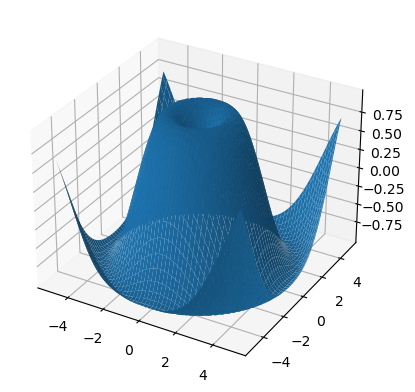

In [ ]:
torch.equal(torch.cat(tuple(torch.dstack([grid_x, grid_y]))),
            torch.cartesian_prod(x, y))

import matplotlib.pyplot as plt
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = torch.sin(torch.sqrt(x * x + y * y))
ax = plt.axes(projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
plt.show()

## torch.matmul

In [ ]:
# vector x vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
tensor1, tensor2

(tensor([0.6342, 0.6817, 0.5164]), tensor([-0.5737,  1.6013,  0.5605]))

In [ ]:
torch.matmul(tensor1, tensor2)

tensor(1.0173)

In [ ]:
# matrix x vector
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)
tensor1, tensor2

(tensor([[-0.7989, -0.2968, -0.5672, -0.3673],
         [ 0.3948,  0.9695, -0.9593,  0.5856],
         [-0.6744,  1.4336, -1.3985, -0.2974]]),
 tensor([-2.0189, -1.3822, -0.2220,  0.0440]))

In [ ]:
torch.matmul(tensor1, tensor2).size(), torch.matmul(tensor1, tensor2)

(torch.Size([3]), tensor([ 2.1329, -1.8983, -0.3226]))

In [ ]:
# batched matrix x broadcasted vector
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3])

In [ ]:
# batched matrix x batched matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

In [ ]:
# batched matrix x broadcasted matrix
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])